In [1]:
%pip install cartopy pandas matplotlib chardet

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
from helper import calculate_group_directions, calculate_group_distances, remove_outliers
import numpy as np

# Detect the file encoding


file_path = 'jaguar_movement_data.csv'
jaguar_data_original = pd.read_csv(file_path)
jaguar_data = jaguar_data_original.copy()

file_path_aditional = 'jaguar_additional_information_2.csv'
jaguar_info_original = pd.read_csv(file_path_aditional)
jaguar_info = jaguar_info_original.copy()

# This will be set to see most of the infomation of any print that i make
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000); 

<ipython-input-2-8f266afe5844>:15: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  jaguar_data_original = pd.read_csv(file_path)


In [3]:
# Now lets see the first five rows of the data set to confirm its values
print(jaguar_data_original.head())

print(jaguar_data_original.shape)

   Event_ID      timestamp  location.long  location.lat  \
0       1.0  6/15/10 22:43     -58.030128    -23.326947   
1       2.0   6/16/10 2:52     -58.030643    -23.328427   
2       3.0  6/16/10 22:36     -58.030472    -23.327311   
3       4.0  6/17/10 16:42     -58.027983    -23.309952   
4       5.0  6/17/10 20:37     -58.027747    -23.310006   

  individual.taxon.canonical.name tag.local.identifier  \
0                   Panthera onca             0-333005   
1                   Panthera onca             0-333005   
2                   Panthera onca             0-333005   
3                   Panthera onca             0-333005   
4                   Panthera onca             0-333005   

   individual.local.identifier (ID)   study.name   country  
0                                 1  Humid Chaco  Paraguay  
1                                 1  Humid Chaco  Paraguay  
2                                 1  Humid Chaco  Paraguay  
3                                 1  Humid Chaco  Pa

In [4]:
print(jaguar_info_original.head())

print(jaguar_info_original.shape)

   ID     Sex  Estimated Age  Weight     Collar Type Collar Brand  \
0   1  Female            3.0    60.0  GPS Globalstar    Northstar   
1   2  Female            9.0    45.0  GPS Globalstar    Northstar   
2   3    Male            6.0   101.0  GPS Globalstar    Northstar   
3   4  Female            4.0    68.0  GPS Globalstar    Northstar   
4   5  Female            6.0    74.0  GPS Globalstar    Northstar   

  Planned Schedule                            Project Leader  \
0              4 h  Roy T. McBride. Jr.. Jeffrey J. Thompson   
1              4 h  Roy T. McBride. Jr.. Jeffrey J. Thompson   
2              4 h  Roy T. McBride. Jr.. Jeffrey J. Thompson   
3              4 h  Roy T. McBride. Jr.. Jeffrey J. Thompson   
4              4 h  Roy T. McBride. Jr.. Jeffrey J. Thompson   

                                          Contact  
0  rocktmcbride@yahoo.com. jthompson.py@gmail.com  
1  rocktmcbride@yahoo.com. jthompson.py@gmail.com  
2  rocktmcbride@yahoo.com. jthompson.py@gmai

In [5]:
# Now we will check information about each column (nulls, type)
print(jaguar_data_original.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134690 entries, 0 to 134689
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Event_ID                          134690 non-null  float64
 1   timestamp                         134690 non-null  object 
 2   location.long                     134690 non-null  float64
 3   location.lat                      134690 non-null  float64
 4   individual.taxon.canonical.name   134690 non-null  object 
 5   tag.local.identifier              134690 non-null  object 
 6   individual.local.identifier (ID)  134690 non-null  int64  
 7   study.name                        134690 non-null  object 
 8   country                           134690 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.2+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                117 non-null    int64  
 1   Sex               117 non-null    object 
 2   Estimated Age     115 non-null    float64
 3   Weight            108 non-null    float64
 4   Collar Type       117 non-null    object 
 5   Collar Brand      117 non-null    object 
 6   Planned Schedule  117 non-null    object 
 7   Project Leader    117 non-null    object 
 8   Contact           117 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.4+ KB
None
['Female' 'Male']


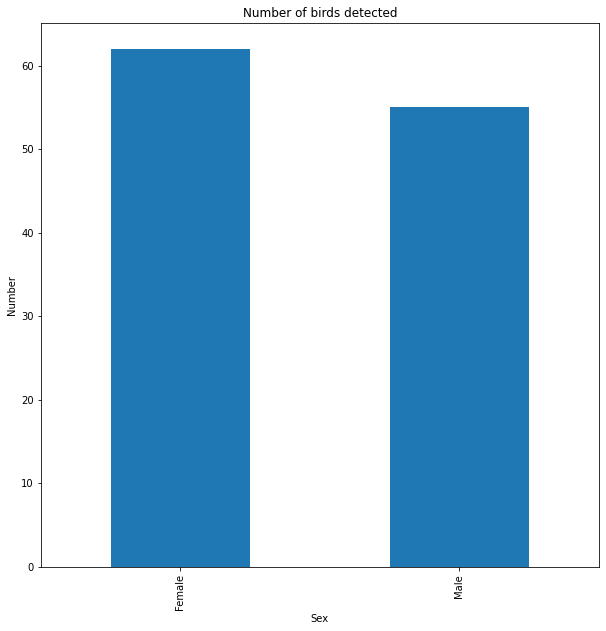

In [6]:
# Now we will check information about each column of jaguar_info (nulls, type)
print(jaguar_info_original.info())

print(jaguar_info_original['Sex'].unique())

gender = jaguar_info_original['Sex'].value_counts()

gender.plot(kind='bar',figsize=(10,10))
plt.title('Number of birds detected')
plt.xlabel('Sex')
plt.ylabel('Number')
plt.show()

In [7]:
# For good measure we will also check for null values in each column and unique value columns
print(jaguar_data_original.isnull().sum().to_frame().T)

print(jaguar_data_original.nunique().to_frame().T)

   Event_ID  timestamp  location.long  location.lat  \
0         0          0              0             0   

   individual.taxon.canonical.name  tag.local.identifier  \
0                                0                     0   

   individual.local.identifier (ID)  study.name  country  
0                                 0           0        0  
   Event_ID  timestamp  location.long  location.lat  \
0    134690      88147         122012        124414   

   individual.taxon.canonical.name  tag.local.identifier  \
0                                1                   113   

   individual.local.identifier (ID)  study.name  country  
0                               117          20        5  


In [8]:
# For good measure we will also check for null values in each column and unique value columns
print(jaguar_info_original.isnull().sum().to_frame().T)

print(jaguar_info_original.nunique().to_frame().T)

   ID  Sex  Estimated Age  Weight  Collar Type  Collar Brand  \
0   0    0              2       9            0             0   

   Planned Schedule  Project Leader  Contact  
0                 0               0        0  
    ID  Sex  Estimated Age  Weight  Collar Type  Collar Brand  \
0  117    2             15      63            6             7   

   Planned Schedule  Project Leader  Contact  
0                13              18       18  


Since there are null values in the columns "Estimated Age" and "Weight" of the jaguar_info df when will be placing them with 0

In [9]:
jaguar_info["Estimated Age"]= jaguar_info["Estimated Age"].fillna(value=0)
jaguar_info["Weight"]= jaguar_info["Weight"].fillna(value=0)

Since there are no null values there is no need to remove them

In [10]:
for info in list(jaguar_data.columns):
    print(info)

Event_ID
timestamp
location.long
location.lat
individual.taxon.canonical.name
tag.local.identifier
individual.local.identifier (ID)
study.name
country


In [11]:
for info in list(jaguar_info.columns):
    print(info)

ID
Sex
Estimated Age
Weight
Collar Type
Collar Brand
Planned Schedule
Project Leader
Contact


In [12]:
# Next lets rename columns and drop the ones that we won´t use 
## We will also be deleting the individual.taxon.canonical.name since it only as one unique value
jaguar_data.rename(columns={'location.long': 'longitude', 'location.lat': 'latitude', 'individual.local.identifier (ID)': 'individual_id' }, inplace=True)
jaguar_data.drop(['Event_ID', 'individual.taxon.canonical.name','tag.local.identifier', 'study.name', 'country'], axis=1,inplace=True)
# Convert timestamp to datetime format
jaguar_data['timestamp'] = pd.to_datetime(jaguar_data['timestamp'], errors='coerce')

# Check for conversion issues
print(jaguar_data.dtypes)

jaguar_info.rename(columns={'ID':'individual_id','Sex': 'sex', 'Estimated Age': 'age', 'Weight': 'weight' }, inplace=True)
jaguar_info.drop(['Collar Type', 'Collar Brand','Planned Schedule', 'Project Leader', 'Contact'], axis=1,inplace=True)


<ipython-input-12-c2e9a843abe8>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jaguar_data['timestamp'] = pd.to_datetime(jaguar_data['timestamp'], errors='coerce')


timestamp        datetime64[ns]
longitude               float64
latitude                float64
individual_id             int64
dtype: object


In [13]:
for info in list(jaguar_data.columns):
    print(info)

timestamp
longitude
latitude
individual_id


In [14]:
for info in list(jaguar_info.columns):
    print(info)

individual_id
sex
age
weight


In [15]:

jaguar_datanew = jaguar_data.merge(jaguar_info, on='individual_id', how='left')
print(jaguar_datanew)

jaguar_groups = {individual_id: group for individual_id, group in jaguar_data.groupby('individual_id')}
print(jaguar_groups)
# Now lets print the number of elements for each jaguard
for jaguar_id, subset in jaguar_groups.items():
    print(f"Jaguar {jaguar_id}: {len(subset)} records")

                 timestamp  longitude   latitude  individual_id     sex  age  \
0      2010-06-15 22:43:00 -58.030128 -23.326947              1  Female  3.0   
1      2010-06-16 02:52:00 -58.030643 -23.328427              1  Female  3.0   
2      2010-06-16 22:36:00 -58.030472 -23.327311              1  Female  3.0   
3      2010-06-17 16:42:00 -58.027983 -23.309952              1  Female  3.0   
4      2010-06-17 20:37:00 -58.027747 -23.310006              1  Female  3.0   
...                    ...        ...        ...            ...     ...  ...   
134685 2016-02-14 21:00:00 -57.488719 -16.901141            117  Female  6.0   
134686 2016-02-14 22:00:00 -57.488709 -16.901154            117  Female  6.0   
134687 2016-02-14 23:00:00 -57.488766 -16.901114            117  Female  6.0   
134688 2016-02-15 00:00:00 -57.477037 -16.898847            117  Female  6.0   
134689 2016-02-15 01:00:00 -57.484627 -16.907812            117  Female  6.0   

        weight  
0         60.0  
1    

In [16]:


# Add basic time-based features
jaguar_datanew['hour'] = jaguar_datanew['timestamp'].dt.hour
jaguar_datanew['day'] = jaguar_datanew['timestamp'].dt.day
jaguar_datanew['month'] = jaguar_datanew['timestamp'].dt.month
jaguar_datanew['year'] = jaguar_datanew['timestamp'].dt.year
jaguar_datanew['dayofweek'] = jaguar_datanew['timestamp'].dt.dayofweek

# Add time period categories
jaguar_datanew['time_of_day'] = pd.cut(jaguar_datanew['hour'], 
                                      bins=[0, 6, 12, 18, 24], 
                                      labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Calculate time differences between consecutive points for each jaguar
jaguar_datanew['time_diff'] = jaguar_datanew.groupby('individual_id')['timestamp'].diff()

# Calculate distance and speed for each consecutive point
jaguar_datanew['distance'] = jaguar_datanew.groupby('individual_id', group_keys=False).apply(calculate_group_distances)

# Calculate speed (km/h)
jaguar_datanew['time_diff_hours'] = jaguar_datanew['time_diff'].dt.total_seconds() / 3600
jaguar_datanew['speed'] = jaguar_datanew['distance'] / jaguar_datanew['time_diff_hours'].replace({0: np.nan})

# Calculate direction using the new function
jaguar_datanew['direction'] = jaguar_datanew.groupby('individual_id', group_keys=False).apply(calculate_group_directions)

# Clean up any infinite values
jaguar_datanew = jaguar_datanew.replace([np.inf, -np.inf], np.nan)

# Apply outlier removal to speed and distance
jaguar_datanew = remove_outliers(jaguar_datanew, 'speed')
jaguar_datanew = remove_outliers(jaguar_datanew, 'distance')

# Fill NaN values with appropriate methods
jaguar_datanew['speed'] = jaguar_datanew['speed'].fillna(method='ffill')
jaguar_datanew['distance'] = jaguar_datanew['distance'].fillna(method='ffill')
jaguar_datanew['direction'] = jaguar_datanew['direction'].fillna(method='ffill')

# Let's verify the calculations
print("\nFirst few rows of the processed data:")
print(jaguar_datanew[['individual_id', 'timestamp', 'latitude', 'longitude', 'distance', 'speed', 'direction']].head(10))

# Basic statistics of the new columns
print("\nDistance statistics:")
print(jaguar_datanew['distance'].describe())

print("\nSpeed statistics:")
print(jaguar_datanew['speed'].describe())

print("\nDirection statistics:")
print(jaguar_datanew['direction'].describe())



First few rows of the processed data:
   individual_id           timestamp   latitude  longitude  distance  \
0              1 2010-06-15 22:43:00 -23.326947 -58.030128  0.172765   
1              1 2010-06-16 02:52:00 -23.328427 -58.030643  0.125316   
2              1 2010-06-16 22:36:00 -23.327311 -58.030472  1.946894   
3              1 2010-06-17 16:42:00 -23.309952 -58.027983  0.024837   
4              1 2010-06-17 20:37:00 -23.310006 -58.027747  1.540524   
5              1 2010-06-18 00:44:00 -23.297174 -58.022060  2.696623   
6              1 2010-06-19 01:37:00 -23.274697 -58.012147  0.806503   
7              1 2010-06-19 05:37:00 -23.273292 -58.004401  0.803627   
8              1 2010-06-19 18:37:00 -23.276092 -57.997148  0.442586   
9              1 2010-06-19 22:58:00 -23.273517 -57.993844  0.583254   

      speed   direction  
0       NaN  197.720033  
1  0.030197    8.008987  
2  0.098660    7.501586  
3  0.001372  103.990433  
4  0.393325   22.149132  
5  0.655050 

<ipython-input-16-372a3eb8540e>:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  jaguar_datanew['speed'] = jaguar_datanew['speed'].fillna(method='ffill')
<ipython-input-16-372a3eb8540e>:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  jaguar_datanew['distance'] = jaguar_datanew['distance'].fillna(method='ffill')
<ipython-input-16-372a3eb8540e>:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  jaguar_datanew['direction'] = jaguar_datanew['direction'].fillna(method='ffill')


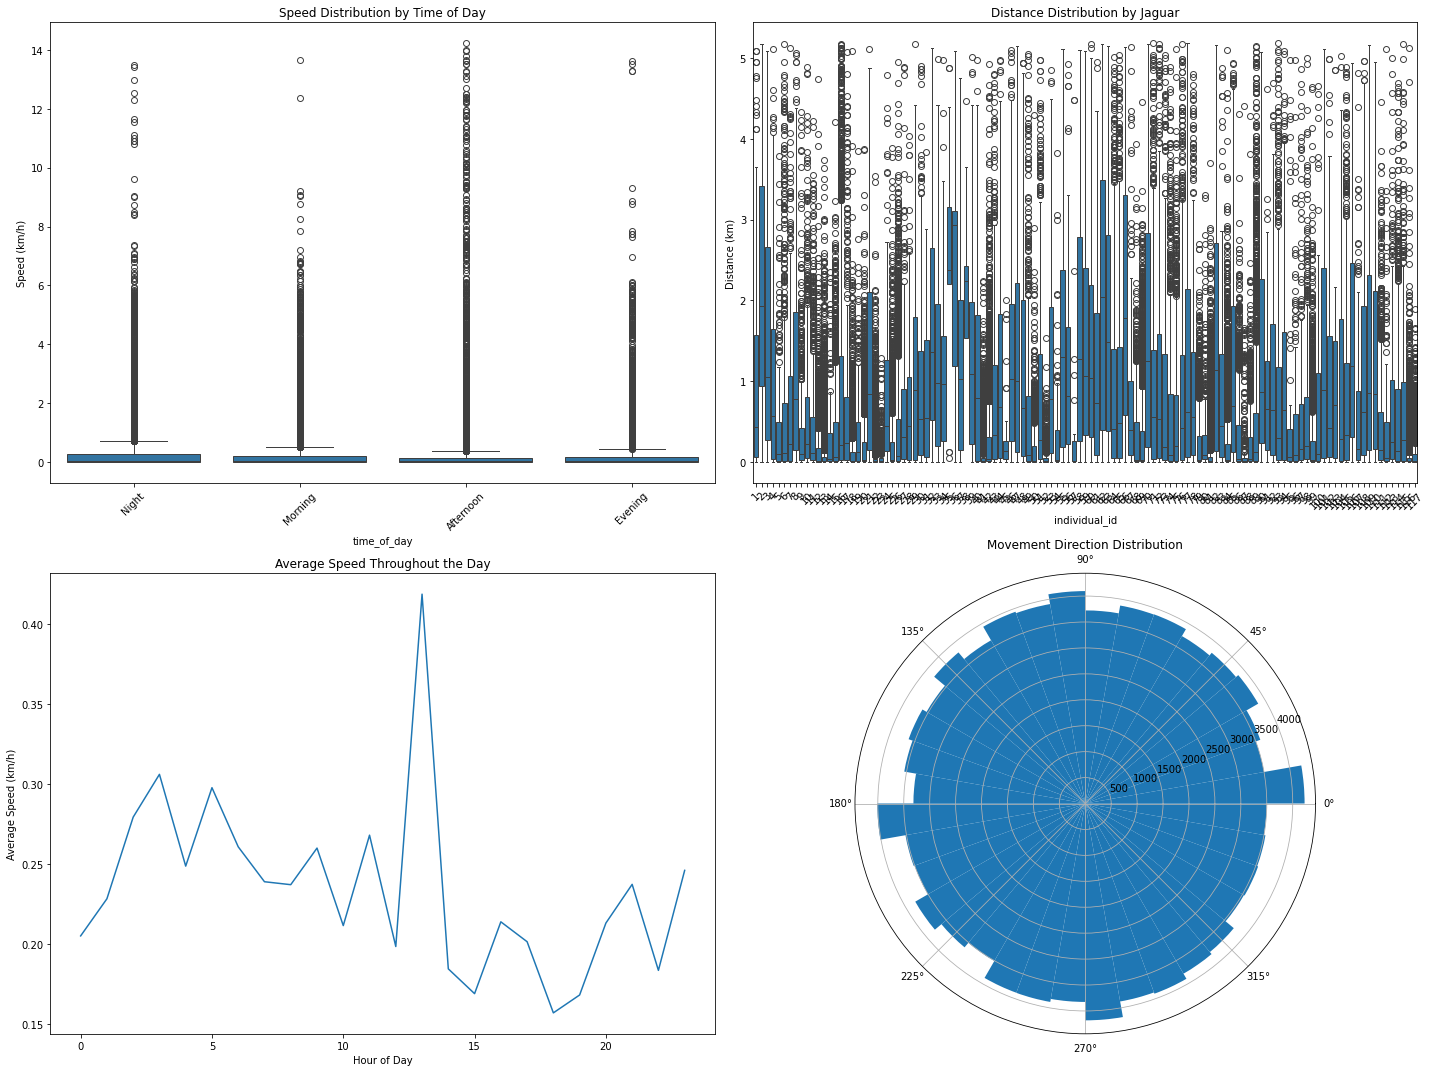

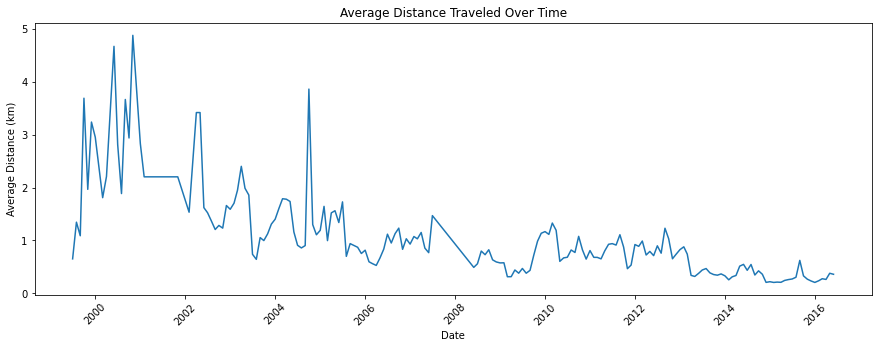

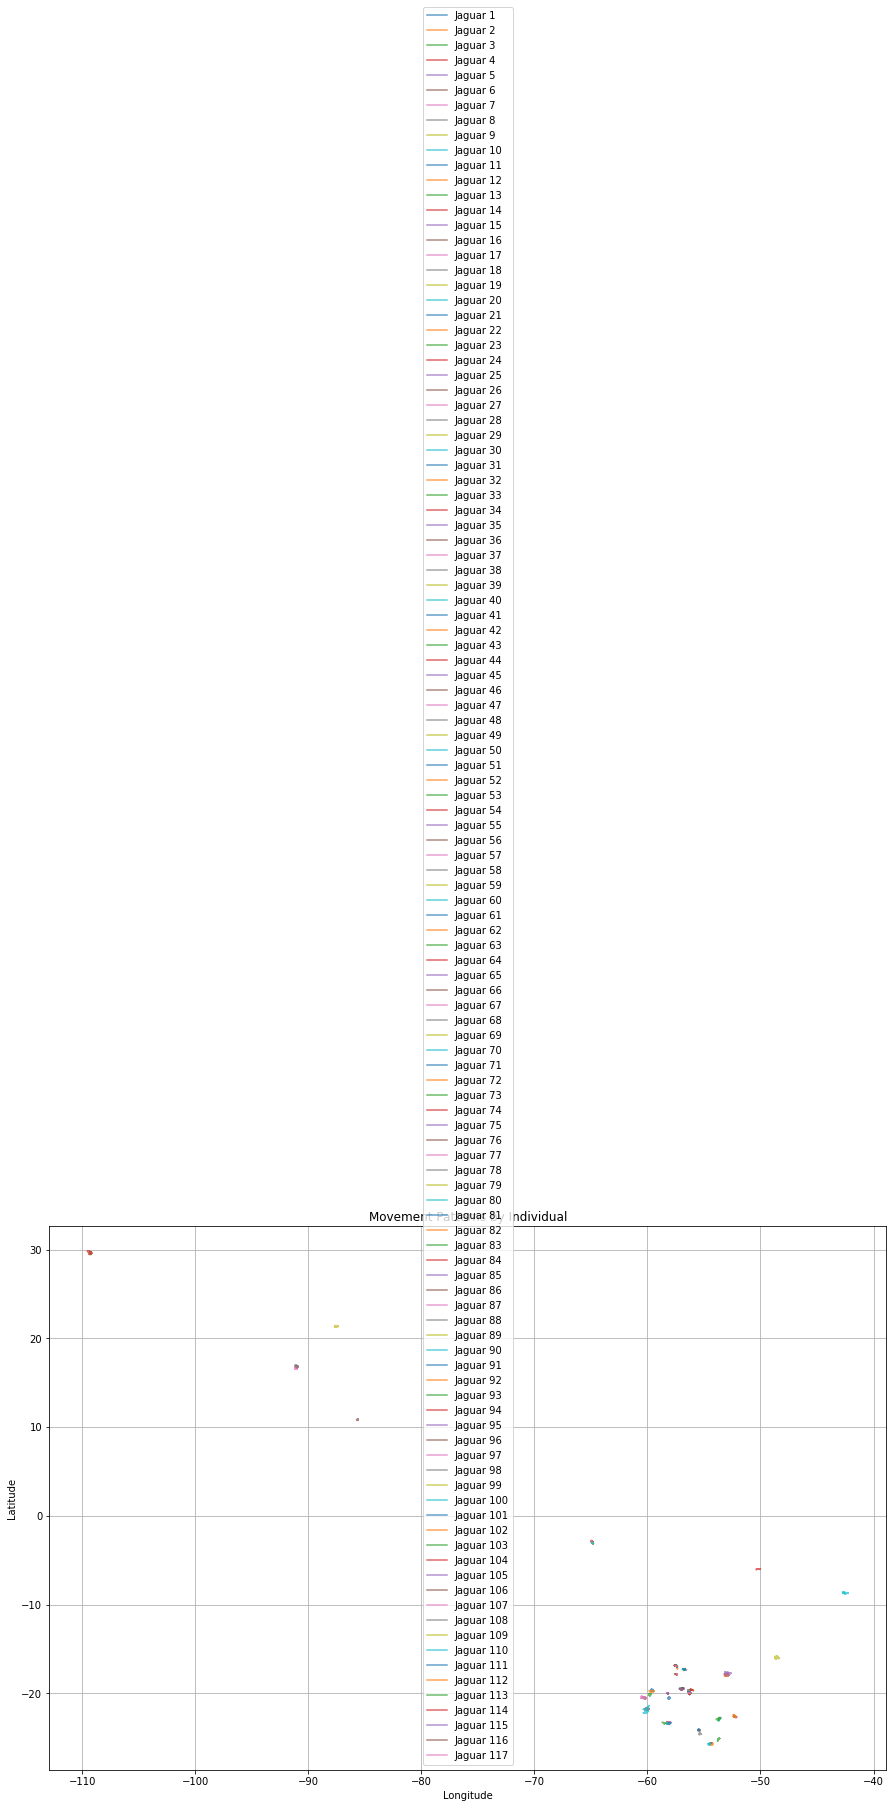


Movement Statistics by Time of Day:
             speed        distance       
              mean    std     mean    std
time_of_day                              
Night        0.269  0.596    0.518  0.893
Morning      0.232  0.540    0.421  0.791
Afternoon    0.229  0.809    0.349  0.715
Evening      0.211  0.543    0.521  0.919

Movement Statistics by Individual:
               speed        distance       
                mean    std     mean    std
individual_id                              
1              0.155  0.274    1.010  1.245
2              0.142  0.271    2.194  1.492
3              0.441  0.758    1.543  1.486
4              0.260  0.380    1.004  1.136
5              0.098  0.167    0.418  0.679
6              0.218  0.421    0.615  1.039
7              0.199  0.317    0.675  0.931
8              0.180  0.304    1.149  1.170
9              0.161  0.328    0.350  0.593
10             0.261  0.447    0.540  0.699
11             0.133  0.275    0.463  0.727
12             0.

<ipython-input-17-0bc8d275767c>:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(jaguar_datanew.groupby('time_of_day')[['speed', 'distance']].agg(['mean', 'std']).round(3))


In [17]:

# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# 1. Speed distribution by time of day
plt.subplot(2, 2, 1)
sns.boxplot(x='time_of_day', y='speed', data=jaguar_datanew)
plt.title('Speed Distribution by Time of Day')
plt.xticks(rotation=45)
plt.ylabel('Speed (km/h)')

# 2. Distance distribution by jaguar
plt.subplot(2, 2, 2)
sns.boxplot(x='individual_id', y='distance', data=jaguar_datanew)
plt.title('Distance Distribution by Jaguar')
plt.xticks(rotation=45)
plt.ylabel('Distance (km)')

# 3. Movement patterns over 24 hours
plt.subplot(2, 2, 3)
hourly_speed = jaguar_datanew.groupby('hour')['speed'].mean()
plt.plot(hourly_speed.index, hourly_speed.values)
plt.title('Average Speed Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (km/h)')

# 4. Direction distribution (Rose plot)
plt.subplot(2, 2, 4, projection='polar')
directions = jaguar_datanew['direction'].dropna()
plt.hist(np.deg2rad(directions), bins=36)
plt.title('Movement Direction Distribution')

plt.tight_layout()
plt.show()

# Additional temporal analysis
plt.figure(figsize=(15, 5))
monthly_distance = jaguar_datanew.groupby(['year', 'month'])['distance'].mean().reset_index()
monthly_distance['date'] = pd.to_datetime(monthly_distance[['year', 'month']].assign(day=1))
plt.plot(monthly_distance['date'], monthly_distance['distance'])
plt.title('Average Distance Traveled Over Time')
plt.xlabel('Date')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.show()

# Individual jaguar movement patterns
plt.figure(figsize=(15, 10))
for jaguar_id in jaguar_datanew['individual_id'].unique():
    jaguar_subset = jaguar_datanew[jaguar_datanew['individual_id'] == jaguar_id]
    plt.plot(jaguar_subset['longitude'], jaguar_subset['latitude'], 
             label=f'Jaguar {jaguar_id}', alpha=0.7)
plt.title('Movement Patterns by Individual')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Print some summary statistics
print("\nMovement Statistics by Time of Day:")
print(jaguar_datanew.groupby('time_of_day')[['speed', 'distance']].agg(['mean', 'std']).round(3))

print("\nMovement Statistics by Individual:")
print(jaguar_datanew.groupby('individual_id')[['speed', 'distance']].agg(['mean', 'std']).round(3))

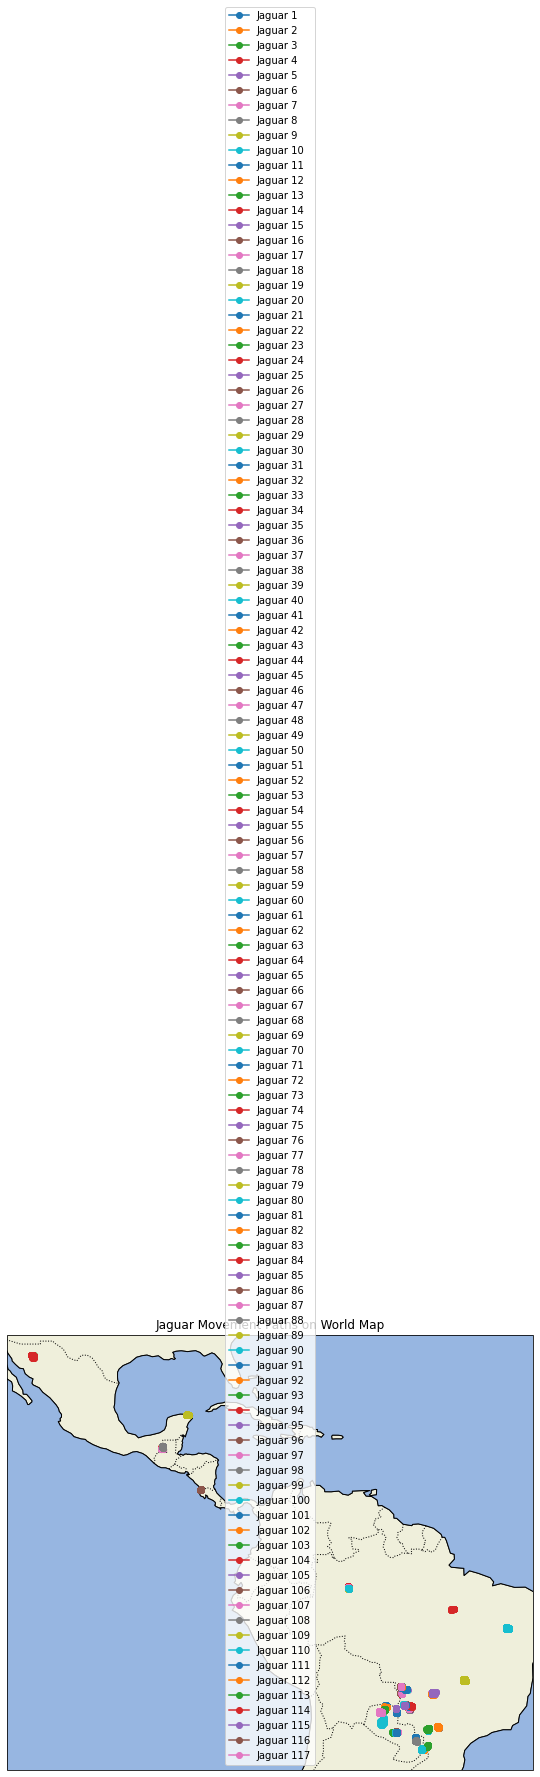

In [18]:
fig, ax = plt.subplots(figsize=(40, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the extent to the whole world (-180 to 180 longitude, -90 to 90 latitude)
# ax.set_global()

# Add map features
ax.add_feature(cfeatures.LAND, edgecolor='black')
ax.add_feature(cfeatures.OCEAN)
ax.add_feature(cfeatures.COASTLINE)
ax.add_feature(cfeatures.BORDERS, linestyle=':')

# Plot each jaguar's movement
for jaguar_id, subset in jaguar_groups.items():
    ax.plot(subset['longitude'], subset['latitude'], marker='o', linestyle='-', label=f"Jaguar {jaguar_id}", transform=ccrs.PlateCarree())

# Labels and legend
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Jaguar Movement Paths on World Map")
ax.legend()
plt.show()

# Correlations
As we can see in the plotted correlation matrix underneath:
There is a strong correlation between the following columns:
    - Latitude and longitude (Negative)
There is also moderate correlation between:
    - Timestamp and latitude (positive)
There is a weak or no correlation at all between (values closer to 0 both negative and positive):
    - Individual id and latitude
    - Individual id and longitude
    - Timestamp and longitude



In [19]:
correlation_data = jaguar_datanew.drop('sex',axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_data,  annot=True)

#Filtering Out Self-Correlations
# Unstack the correlation matrix
correlation_pairs = correlation_data.unstack()

# Filter out self-correlations (where feature pairs are the same)
filtered_correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Sort the remaining pairs in descending order of correlation
filtered_correlation_pairs = filtered_correlation_pairs.sort_values(kind="quicksort", ascending=True)

print(filtered_correlation_pairs)

ValueError: could not convert string to float: 'Evening'

In [ ]:

# for jaguar_id, subset in jaguar_groups.items():
#     ax1 = subset.head().plot.scatter(x='timestamp',
#                        y='longitude',
#                        c='DarkBlue')
    #print(subset.corr())

# Splitting dataset

In [ ]:
jaguar_data_copy = jaguar_data.copy()
X_copy = jaguar_data_copy.drop('individual_id', axis=1)
X_copy.shape


In [ ]:

y_copy = jaguar_data_copy['individual_id']         # we want to predict y using X
y_copy.shape

In [ ]:
#1 - Split the dataset: tes=25%; training=75%
# test size=25%
X_train, X_test, y_train, y_test = train_test_split(X_copy,y_copy,test_size=0.25,random_state=40)

print(len(X_train)*100/len(jaguar_data_copy))